# Model Selection and Validation
We are going to assume that $y=f(x)$ with $x \in \mathbb{R}$ and $y \in \mathbb{R}$, where $f(x)$ is some function. Then we are going to learn the polynomial of degree 2, 3, and 10 on 10 point of training data, and see how they perform on the training set. Then we will use a validation set of 10 points to pick the best model. At the end we will use 10 points as test set, to estimate the generalization error. You can think of having had 30 points in your data and decided to use 10 for training, 10 for validation, and 10 for testing.


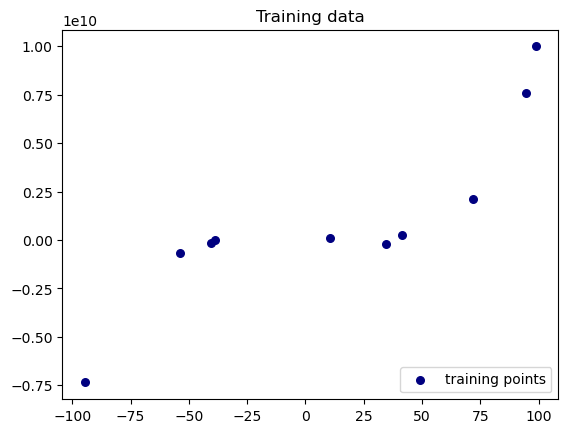

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

random.seed(105)

#generate data according to a polynomial of degree 5 + noise; noise is added after we computed f
def f(x):
    """ function to approximate by polynomial interpolation"""
    return np.polynomial.polynomial.polyval(x,[-72., 162., -28., -31.5, 2.5, 1])+200000000*np.random.normal(size=len(x))

#generate data according to the same polynomial of degree 5 above but without noise - used only
#for plotting!
def f_noisefree(x):
    """ function to approximate by polynomial interpolation"""
    return np.polynomial.polynomial.polyval(x,[-72., 162., -28., -31.5, 2.5, 1])


# generate points used to plot
x_plot = np.linspace(-100, 100, 1000)

# generate points and keep a subset of them
x = np.linspace(-100, 100, 1000)
rng = np.random.RandomState(0)
rng.shuffle(x)
#10 points for the training data
x_train = x[:10]
y_train = f(x_train)

# create matrix versions of of x_train and x_plot
X_train = x_train.reshape(len(x_train),1)
X_plot = x_plot.reshape(len(x_plot),1)

#for plotting
plt.scatter(x_train, y_train, color='navy', s=30, marker='o', label="training points")
plt.legend(loc='lower right')
plt.title('Training data')
plt.show()

Error on training data for polynomial of degree 2: 0.2469645845128121
Error on training data for polynomial of degree 3: 0.007566838672709575
Error on training data for polynomial of degree 10: 0.00052191736959184


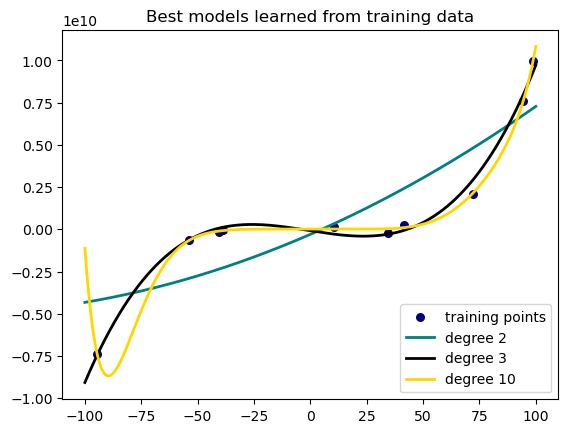

In [2]:
#for plot
colors = ['teal', 'black', 'gold']
plt.scatter(x_train, y_train, color='navy', s=30, marker='o', label="training points")

#train the best polynomial model of degrees 2, 3, and 10 using functions from scikit-learn, and plot them
for count, degree in enumerate([2, 3, 10]):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_plot = model.predict(X_plot)
    print("Error on training data for polynomial of degree "+str(degree)+": "+str(1.-model.score(X_train,y_train)))
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=2, label="degree "+str(degree))

plt.legend(loc='lower right')
plt.title('Best models learned from training data')
plt.show()

### degree=10 seems to be the best choice, but ...
### It is not suffcient to look at the results on the training data,  let's do validation! 

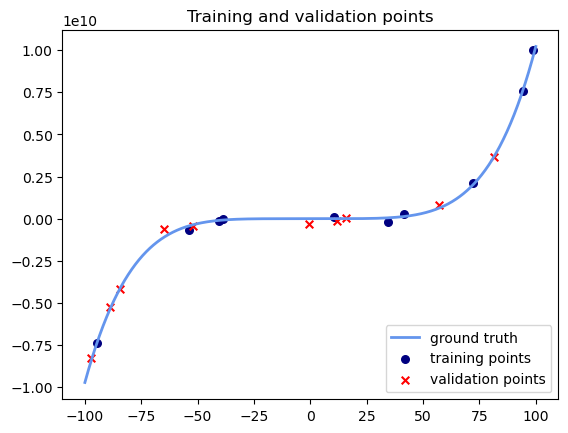

In [3]:
#let's use a validation dataset of the same number of points of the training set
x_validation = x[10:20]
y_validation = f(x_validation)

# create matrix versions of x_validation
X_validation = x_validation.reshape(len(x_validation),1)

#for plotting
plt.plot(x_plot, f_noisefree(x_plot), color='cornflowerblue', linewidth=2, label="ground truth")
plt.scatter(x_train, y_train, color='navy', s=30, marker='o', label="training points")
plt.scatter(x_validation, y_validation, color='red', s=30, marker='x', label="validation points")
plt.legend(loc='lower right')
plt.title('Training and validation points')
plt.show()

Error on validation data for polynomial of degree 2: 0.4024831492990246
Error on validation data for polynomial of degree 3: 0.03422972101289545
Error on validation data for polynomial of degree 10: 0.3530530073283833


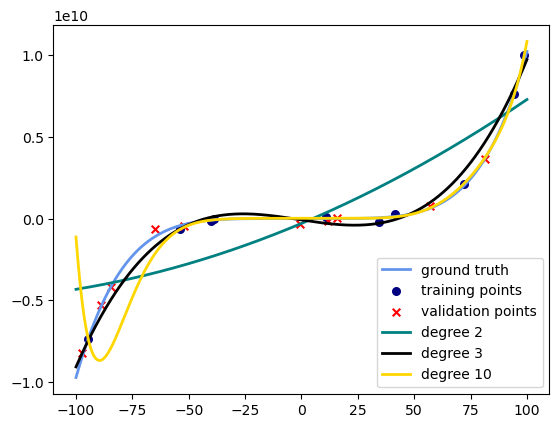

In [4]:
#for plotting  
plt.plot(x_plot, f_noisefree(x_plot), color='cornflowerblue', linewidth=2, label="ground truth")
plt.scatter(x_train, y_train, color='navy', s=30, marker='o', label="training points")
plt.scatter(x_validation, y_validation, color='red', s=30, marker='x', label="validation points")

#let's do validation
for count, degree in enumerate([2, 3, 10]):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train) #ERM on training set to pick the hypothesis h_degree
    y_plot = model.predict(X_plot)
    #ERM on validation set to pick the best hypothesis in H_degree for the best degree
    print("Error on validation data for polynomial of degree "+str(degree)+": "+str(1.-model.score(X_validation,y_validation)))
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=2, label="degree "+str(degree))

plt.legend(loc='lower right')
plt.show()

### After performing validation, the best choice is degree=3, not 10!

In [5]:
#now let's use a test set to estimate the generalization error using degree=3
x_testing = x[20:30]
y_testing = f(x_testing)

# create matrix versions of x_testing
X_testing = x_testing.reshape(len(x_testing),1)

#let's test our model
degree = 3
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)
print("Error on test data for polynomial of degree "+str(degree)+": "+str(1.-model.score(X_testing,y_testing)))

Error on test data for polynomial of degree 3: 0.027263039291788305
